In [1]:
#Importing libraries
import pandas as pd

#Visualization Libraries
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium 
from folium import plugins

#Manipulating the default plot 
plt.rcParams['figure.figsize'] = 10,12

#Disable warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Learn how to read datasets
df=pd.read_excel("covid_19_india.xlsx", parse_dates=True, sheet_name='mofhw')
df_india = df.copy()
df

,S. No.,Name of State / UT,Total Confirmed cases (Including 76 foreign Nationals),Cured/Discharged/migrated,Death
0,1,Andaman and Nicobar Islands,11,10,0
1,2,Andhra Pradesh,572,36,14
2,3,Arunachal Pradesh,1,0,0
3,4,Assam,35,5,1
4,5,Bihar,83,37,1
5,6,Chandigarh,21,9,0
6,7,Chhattisgarh,36,23,0
7,8,Delhi,1640,51,38
8,9,Goa,7,6,0
9,10,Gujarat,1021,74,38


In [3]:
#df.drop(['S. No.'], axis=1, inplace=True)
df['Total cases'] = df['Total Confirmed cases (Including 76 foreign Nationals)']
total_cases = df['Total cases'].sum()
print('Total number of confirmed Corvid 19 cases in India till date:', total_cases)

Total number of confirmed Corvid 19 cases in India till date: 13835


In [4]:
df.style.background_gradient(cmap = 'Reds')

,S. No.,Name of State / UT,Total Confirmed cases (Including 76 foreign Nationals),Cured/Discharged/migrated,Death,Total cases
0,1,Andaman and Nicobar Islands,11,10,0,11
1,2,Andhra Pradesh,572,36,14,572
2,3,Arunachal Pradesh,1,0,0,1
3,4,Assam,35,5,1,35
4,5,Bihar,83,37,1,83
5,6,Chandigarh,21,9,0,21
6,7,Chhattisgarh,36,23,0,36
7,8,Delhi,1640,51,38,1640
8,9,Goa,7,6,0,7
9,10,Gujarat,1021,74,38,1021


In [5]:
#Total Active number of cases = Total cases - (Deaths + cured)
df['Total Active'] = df['Total Confirmed cases (Including 76 foreign Nationals)'] - (df['Death'] + df['Cured/Discharged/migrated'])
total_active = df['Total Active'].sum()
print('Total number of active Covid 19 cases across India: ', total_active)
Tot_Cases = df.groupby('Name of State / UT')['Total Active'].sum().sort_values(ascending=False).to_frame()
Tot_Cases.style.background_gradient(cmap = 'Reds')

Total number of active Covid 19 cases across India:  11616


,Total Active
Name of State / UT,
Maharashtra,2711
Delhi,1551
Madhya Pradesh,1186
Tamil Nadu,1072
Rajasthan,956
Gujarat,909
Uttar Pradesh,758
Telengana,539
Andhra Pradesh,522


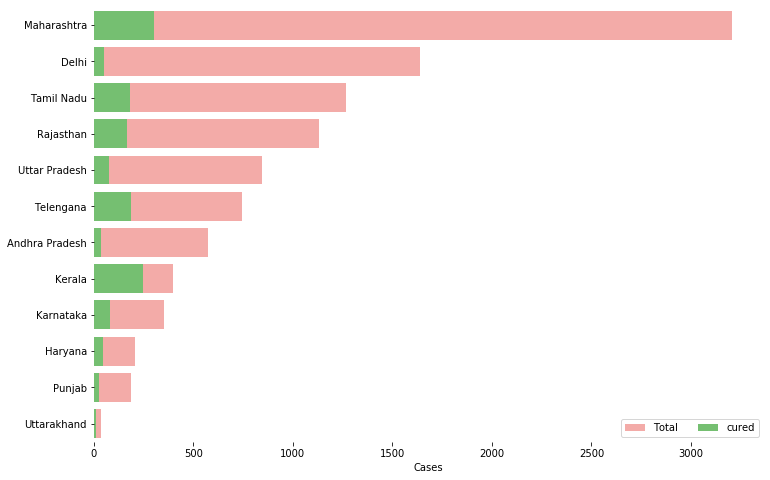

In [6]:
#Confirmed vs Recovered figures
#Visualization using Seaborn
India_coord = pd.read_excel("Indian Coordinates.xlsx")

df_full = pd.merge(India_coord,df, on = 'Name of State / UT')
f, ax = plt.subplots(figsize=(12,8))
data = df_full[['Name of State / UT', 'Total cases', 'Cured/Discharged/migrated', 'Death']]
data.sort_values('Total cases', ascending = False, inplace =True)
sns.set_color_codes("pastel")
sns.barplot(x='Total cases', y='Name of State / UT', data = data, label='Total', color='r')

sns.set_color_codes('muted')
sns.barplot(x='Cured/Discharged/migrated', y = 'Name of State / UT', data=data, label ='cured', color='g')

#Add a legend and informative axis label
ax.legend(ncol=2, loc='lower right', frameon = 'True')
ax.set(ylabel = '', xlabel = 'Cases')
sns.despine(left=True, bottom=True)

In [7]:
#Rise in Corvid cases
import plotly
plotly.io.renderers.default = 'colab'

In [8]:
#creating interactive graphs using plotly
import plotly.graph_objects as go
dbd_India = pd.read_excel('covid_19_india.xlsx', parse_dates=True, sheet_name='Cleaned')

fig = go.Figure()
fig.add_trace(go.Scatter(x=dbd_India['Date'], y=dbd_India['Total cases'], mode='lines+markers', name='Total cases'))
fig.update_layout(title_text='Trend of Corvid 19 Cases in India (Cumulative Cases)', plot_bgcolor='rgb(230, 230, 230)')

fig.show()


In [9]:
#Predicting with FB Prophet
from fbprophet import Prophet as pr

In [10]:
df = pd.read_excel('covid_19_india.xlsx', parse_dates=['Date'], sheet_name='Confirmed')
#df['Date'] = pd.to_datetime(df['Date'])
df

,Date,Cases
0,2020-01-30,1
1,2020-01-31,1
2,2020-02-01,2
3,2020-02-02,3
4,2020-02-03,3
...,...,...
115,2020-05-24,131868
116,2020-05-25,138845
117,2020-05-26,145380
118,2020-05-27,151767


In [11]:
df.groupby('Date')
df['Date'] = pd.to_datetime(df['Date'])
df.columns = ['ds','y']
df.tail()

,ds,y
115,2020-05-24,131868
116,2020-05-25,138845
117,2020-05-26,145380
118,2020-05-27,151767
119,2020-05-28,158333


In [12]:
#confirmed = df.groupby('ds')
#confirmed.columns = ['ds','y']
#confirmed.head()


In [13]:
#confirmed1 = []
#for i in confirmed:
#    confirmed1.append(i)
#confirmed = confirmed1

#confirmed['Date'] = pd.to_datetime(confirmed['Date'])
#confirmed.head()
#type(confirmed)

In [14]:
m = pr(interval_width=0.95)
m.fit(df)
future = m.make_future_dataframe(periods = 11)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
126,2020-06-04
127,2020-06-05
128,2020-06-06
129,2020-06-07
130,2020-06-08


In [15]:
#Predicting the future with date and upper/lower limits of y value
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
121,2020-05-30,155511.890898,150536.618021,160019.922589
122,2020-05-31,160173.490231,155242.934680,164949.373786
123,2020-06-01,164917.969703,160215.592878,170068.108926
124,2020-06-02,169504.001924,164914.980491,174996.709468
125,2020-06-03,174106.806516,168961.382076,179598.521972
126,2020-06-04,178670.638311,173151.726717,183996.654457
127,2020-06-05,182516.418884,177109.758593,188072.044166
128,2020-06-06,187047.693555,181446.488888,193126.154186
129,2020-06-07,191709.292887,185903.700245,197741.575398
130,2020-06-08,196453.772360,189638.917920,203053.251536


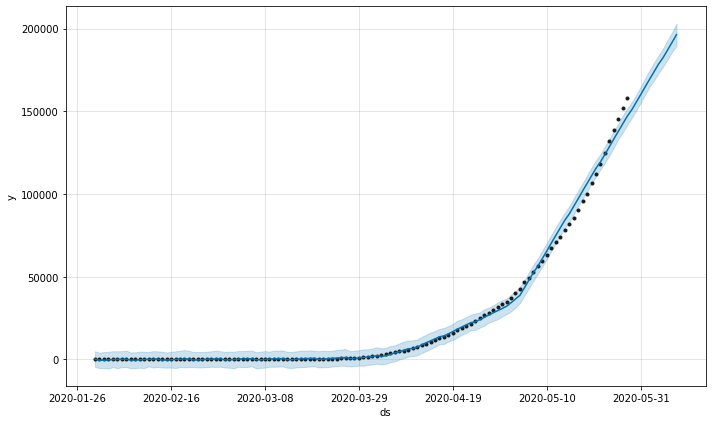

In [16]:
confirmed_forecast_plot = m.plot(forecast)

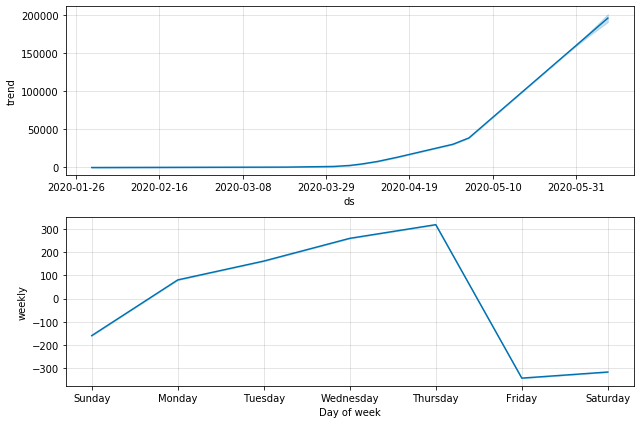

In [17]:
confirmed_forecast_plot = m.plot_components(forecast)

In [18]:
#Predicting with FB Prophet -- since march 15th
from fbprophet import Prophet as pr

In [19]:
df = pd.read_excel('covid_19_india.xlsx', parse_dates=['Date'], sheet_name='Confirmed_march')
df

,Date,Cases
0,2020-01-30,1
1,2020-01-31,1
2,2020-02-01,2
3,2020-02-02,3
4,2020-02-03,3
...,...,...
61,2020-03-31,1397
62,2020-04-01,1834
63,2020-04-02,2069
64,2020-04-03,2547


In [20]:
df.groupby('Date')
df['Date'] = pd.to_datetime(df['Date'])
df.columns = ['ds','y']
df.tail()

,ds,y
61,2020-03-31,1397
62,2020-04-01,1834
63,2020-04-02,2069
64,2020-04-03,2547
65,2020-04-04,3072


In [21]:
m = pr(interval_width=0.95)
m.fit(df)
future = m.make_future_dataframe(periods = 29)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
90,2020-04-29
91,2020-04-30
92,2020-05-01
93,2020-05-02
94,2020-05-03


In [22]:
#Predicting the future with date and upper/lower limits of y value
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
85,2020-04-24,4512.821326,3969.195477,5067.616872
86,2020-04-25,4673.641946,4097.981754,5243.572955
87,2020-04-26,4684.627743,4076.370078,5301.415064
88,2020-04-27,4811.750868,4213.608147,5467.567901
89,2020-04-28,4933.871180,4285.416893,5607.092129
90,2020-04-29,5088.654264,4404.767554,5776.528301
91,2020-04-30,5225.716648,4601.102408,5977.479030
92,2020-05-01,5365.438383,4632.977336,6098.783916
93,2020-05-02,5526.259003,4786.336447,6359.129544
94,2020-05-03,5537.244800,4788.415926,6347.749619


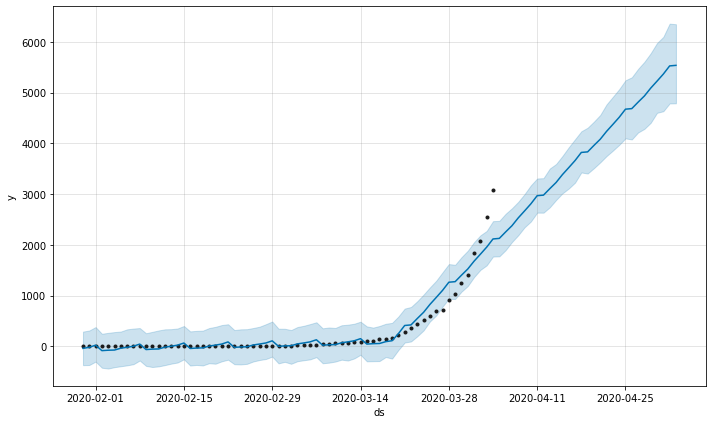

In [23]:
confirmed_forecast_plot = m.plot(forecast)

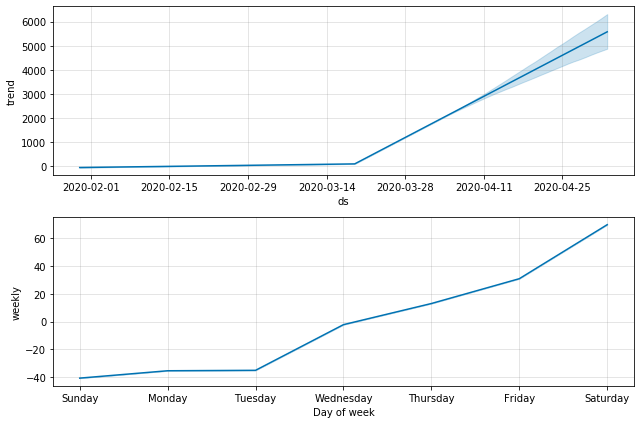

In [24]:
confirmed_forecast_plot = m.plot_components(forecast)